In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import bar_chart_race as bcr

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "../COVID19/World/WorldSummary/"
continents  =  ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
cases = ['Total_Cases', 'New_Cases', 'Total_Deaths', 'New_Deaths', 'Total_Recovered', 'Active_Cases']

In [3]:
given_date = pd.read_csv('../COVID19/World/WorldSummary/Europe/Europe_summary.csv').iloc[-1]['Date']

if '_' in given_date:
    given_date = datetime.datetime.strptime(given_date[:-7] , '%b').strftime("%B")+ ' '+ given_date[-7:-5] + ', '+ given_date[-4:] 
else:
    given_date = given_date[:-2] + ' '+ given_date[-2:] + ', '+ str(2020)
        

given_date

'January 12, 2021'

In [4]:
def format_date(list_date):
    x_date_format = [datetime.datetime.strptime(x[:-7], "%b").strftime('%b') +'-' + x[-7:-5]+'-'+x[-4:] if '_'in x  else  datetime.datetime.strptime(x[:-2], "%B").strftime('%b') +'-' +x[-2:]+'-' +'2020'  for x in list_date]
    return x_date_format    

In [5]:
fig = go.Figure()
for continent in continents:
    continent_mod = continent.replace(" ", "")
    full_path = path + continent_mod + '/'+ continent_mod +'_summary.csv'
    summary = pd.read_csv(full_path)
    list_date=summary['Date'].tolist()
    fig.add_trace(go.Scatter(
#         x=summary['Date'].tolist(),
        x=format_date(summary['Date'].tolist()),
        y= summary['Total_Cases'].tolist(),
#         y = total_cases,
        name=continent,
        mode='lines',
        line=dict(width=3)
        ))   
fig.update_layout(
    template='plotly_dark',        
    title={
#         'text': '<b>'+'WORLD COVID19 CONFIRMED CASES IN AFRICA: ' + date_string +'</b>',
        'text': '<b>'+'WORLD COVID19 CONFIRMED CASES BY CONTINENT: ' + given_date + '</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=dict(title='<b>Date</b>',titlefont_size=18, titlefont=dict(color='#4D4B4B'),nticks=30),
    yaxis=dict(title='<b>Confirmed Cases</b>',titlefont_size=18,  titlefont=dict(color='#BDBDBD')),
    legend=dict(x=0.07, y=0.98,traceorder="normal",bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)',),   
    xaxis_tickangle=90
)
fig.show()

In [6]:
fig = make_subplots(rows=3, cols=2,  specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}],
                                            [{'type':'domain'}, {'type':'domain'}]], print_grid=False,vertical_spacing=0.005,
                                            horizontal_spacing=0.085)

case_val =  []
# slice_colors =  ['crimson', 'green', 'saddlebrown', 'yellow', 'cyan','blue' ]
slice_colors =  ['gold', 'sapphire', 'green', 'saddlebrown', 'cyan','crimson' ]
position = 0
x=[0.168, 0.82, 0.168, 0.82, 0.148, 0.82]
y=[0.84,0.84, 0.5,0.5,0.155, 0.155]
for case in cases:
    row = ((position//2)+1)
    col = ((position%2)+1)
    for continent in continents:
        continent_mod = continent.replace(" ", "")
        full_path = path + continent_mod + '\\'+ continent_mod +'_summary.csv'
        summary = pd.read_csv(full_path)
        case_val.append(summary.iloc[-1][case])
        case_mod = case.replace('_', '\n')
        
    fig.add_trace(go.Pie(labels=continents, values=case_val,name=case, ),row, col) 
    fig.update_traces(hole=.35, hoverinfo="label+percent+name+value", textinfo='percent+value',textfont_size=14,marker_colors=slice_colors,)         
    case_val = []
    fig['layout']['annotations'] += tuple([dict(x=x[position],y=y[position],text='<b>'+case_mod+'</b>', showarrow=False, font_size=12, font=dict(color='black'))])
    fig.update_layout(
    width=990,height=1450,autosize=False,
#     title={'text': '<b>' + 'AFRICA - COVID19 NEW CASES BY REGION: ' + date_string +'</b>',
    title={'text': '<b>' + 'WORLD - COVID19 SUMMARY BY CONTINENT: ' + given_date + '</b>',       
    'y':0.95,
    'x':0.46,
    'xanchor': 'center',
    'yanchor': 'top',
    'font_color':'black',
    'font_size':18},
     legend=dict(x=1, y=1,traceorder="normal",  font=dict(size=13))
    )
    position=position+1  
fig.show()    
    
    


## Countries With Zero Case in the Past One Month

In [7]:
file_path = "../COVID19/World/NewCases"
files = os.listdir(file_path)
latest_new_case = [file for file in files if file[-3:] == 'csv' and file[:10] == 'DailyCases']
latest_new_case

['DailyCases12012021.csv']

In [8]:
last_new_case_record = pd.read_csv('../COVID19/World/LastNewCaseReport/LastNewCaseReport.csv', dtype=object, encoding='utf-8')
last_new_case_record.tail()

Country_Other Total_Cases Total_Recovered Total_Deaths Active_Cases  \
216    Solomon Islands          17              10            0            7   
217   Marshall Islands           4               4            0            0   
218  Wallis and Futuna           4               1            0            3   
219              Samoa           2               2            0            0   
220            Vanuatu           1               1            0            0   

    New_Cases Last_New_Case_Report_Date  
216         0                 24-Nov-20  
217         0                 17-Nov-20  
218         0                 16-Dec-20  
219         0                 27-Nov-20  
220         0                 10-Nov-20

In [9]:
last_new_case_record['last_case'] = last_new_case_record['Last_New_Case_Report_Date']
last_new_case_record['last_case'] = pd.to_datetime(last_new_case_record['last_case'])

date_string = latest_new_case[0]

date_string = date_string[10:18]

date_string = datetime.datetime.strptime(date_string, '%d%m%Y')

last_new_case_record['number_of_days'] =  date_string - last_new_case_record['last_case']

last_new_case_record['days'] = last_new_case_record['number_of_days'].apply(lambda x : str(x).split(' ')[0])

last_new_case_record['days'] = last_new_case_record['days'].astype(int)
last_new_case_record['days']
upto_a_month_free = last_new_case_record[last_new_case_record['days'] >= 30]
upto_a_month_free = upto_a_month_free.copy()
diamond_princes = upto_a_month_free.index[upto_a_month_free['Country_Other'] == 'Diamond Princess'][0]
ms_zaandam = upto_a_month_free.index[upto_a_month_free['Country_Other'] == 'MS Zaandam'][0]
upto_a_month_free.drop(['New_Cases','last_case','days'], axis=1, inplace=True)
upto_a_month_free.drop([diamond_princes, ms_zaandam],  inplace=True)
upto_a_month_free.reset_index(drop=True, inplace=True)
upto_a_month_free

Country_Other Total_Cases Total_Recovered Total_Deaths Active_Cases  \
0          Tanzania         509             183           21          305   
1             Macao          46              46            0            0   
2              Laos          41              40            0            1   
3      Vatican City          27              15            0           12   
4        Montserrat          13              12            1            0   
5    Western Sahara          10               8            1            1   
6   Solomon Islands          17              10            0            7   
7  Marshall Islands           4               4            0            0   
8             Samoa           2               2            0            0   
9           Vanuatu           1               1            0            0   

  Last_New_Case_Report_Date number_of_days  
0                  8-May-20       249 days  
1               26-Jun-2020       200 days  
2               07-Dec-2020        36 days  
3               17-Oct-2020        87 days  
4               11-Jul-2020       185 days  
5               22-Jun-2020       204 days  
6                 24-Nov-20        49 days  
7                 17-Nov-20        56 days  
8                 27-Nov-20        46 days  
9                 10-Nov-20        63 days

In [10]:
 [datetime.datetime.strptime(x[:-7], "%b").strftime('%B') +'-' + x[-7:-5]+'-'+x[-4:] if '_'in x  else  x[:-2] +'-' +x[-2:]+'-' +'2020'  for x in list_date]

['April-16-2020',
 'April-17-2020',
 'April-18-2020',
 'April-19-2020',
 'April-20-2020',
 'April-21-2020',
 'April-22-2020',
 'April-23-2020',
 'April-24-2020',
 'April-25-2020',
 'April-26-2020',
 'April-27-2020',
 'April-28-2020',
 'April-29-2020',
 'April-30-2020',
 'May-01-2020',
 'May-02-2020',
 'May-03-2020',
 'May-04-2020',
 'May-05-2020',
 'May-06-2020',
 'May-07-2020',
 'May-08-2020',
 'May-09-2020',
 'May-10-2020',
 'May-11-2020',
 'May-12-2020',
 'May-13-2020',
 'May-14-2020',
 'May-15-2020',
 'May-16-2020',
 'May-17-2020',
 'May-18-2020',
 'May-19-2020',
 'May-20-2020',
 'May-21-2020',
 'May-22-2020',
 'May-23-2020',
 'May-24-2020',
 'May-25-2020',
 'May-26-2020',
 'May-27-2020',
 'May-28-2020',
 'May-29-2020',
 'May-30-2020',
 'May-31-2020',
 'June-01-2020',
 'June-02-2020',
 'June-03-2020',
 'June-04-2020',
 'June-05-2020',
 'June-06-2020',
 'June-07-2020',
 'June-08-2020',
 'June-09-2020',
 'June-10-2020',
 'June-11-2020',
 'June-12-2020',
 'June-13-2020',
 'June-14-202

In [11]:
##TOTAL CASES - First 20 countries
total_cases = pd.read_csv('../COVID19/World/TotalCases/TotalCases'+latest_new_case[0][-12:])
total_cases.iloc[:,-1] = total_cases.iloc[:,-1].str.replace(',','').fillna(0).str.replace('+','').fillna(0).astype(int)
# total_cases_first20 = total_cases.sort_values(total_cases.iloc[:,-1].name, ascending=False)[1:]['Country_Other'][:20].tolist()
total_cases_first20 = total_cases.sort_values(total_cases.iloc[:,-1].name, ascending=False)[1:]
sorted_new_cases_first20_values = total_cases_first20.iloc[:, -1][:20].tolist()
total_cases_first20 = total_cases_first20['Country_Other'][:20].tolist()
# sorted_new_cases_first20_values
total_cases_first20

['USA',
 'India',
 'Brazil',
 'Russia',
 'UK',
 'France',
 'Turkey',
 'Italy',
 'Spain',
 'Germany',
 'Colombia',
 'Argentina',
 'Mexico',
 'Poland',
 'Iran',
 'South Africa',
 'Ukraine',
 'Peru',
 'Netherlands',
 'Indonesia']

In [12]:
new_cases = pd.read_csv(file_path+'/'+latest_new_case[0])
new_cases

Country_Other  April16  April17  April18  April19  April20  April21  \
0                China      +46     +325      +27      +16      +12      +11   
1                  USA  +29,567  +32,165  +29,057  +25,844  +28,123  +25,985   
2                Spain   +4,289   +5,891   +3,577   +4,258   +1,536   +3,968   
3                Italy   +3,786   +3,493   +3,491   +3,047   +2,256   +2,729   
4               France  +17,164   +1,909   +3,824   +1,101   +2,489   +2,667   
..                 ...      ...      ...      ...      ...      ...      ...   
215    Solomon Islands      NaN      NaN      NaN      NaN      NaN      NaN   
216   Marshall Islands      NaN      NaN      NaN      NaN      NaN      NaN   
217  Wallis and Futuna      NaN      NaN      NaN      NaN      NaN      NaN   
218              Samoa      NaN      NaN      NaN      NaN      NaN      NaN   
219            Vanuatu      NaN      NaN      NaN      NaN      NaN      NaN   

     April22  April23  April24  ... Jan03_2021 Jan04_2021 Jan05_2021  \
0        +30      +10       +6  ...        +24        +33        +33   
1    +29,973  +31,900  +38,958  ...   +194,337   +190,165   +227,169   
2     +4,211   +4,635   +6,740  ...        NaN     +9,043    +16,343   
3     +3,370   +2,646   +3,021  ...    +14,245    +10,800    +15,378   
4     +1,827   +2,239   +1,645  ...    +12,489     +4,022    +20,489   
..       ...      ...      ...  ...        ...        ...        ...   
215      NaN      NaN      NaN  ...        NaN        NaN        NaN   
216      NaN      NaN      NaN  ...        NaN        NaN        NaN   
217      NaN      NaN      NaN  ...        NaN        NaN        NaN   
218      NaN      NaN      NaN  ...        NaN        NaN        NaN   
219      NaN      NaN      NaN  ...        NaN        NaN        NaN   

    Jan06_2021 Jan07_2021 Jan08_2021 Jan09_2021 Jan10_2021 Jan11_2021  \
0          +32        +63        +53        +33        +69       +103   
1     +260,973   +279,154   +301,655   +249,519   +213,453   +214,683   
2          NaN    +16,850    +25,456        NaN        NaN    +24,631   
3      +20,331    +18,020    +17,533    +19,978    +18,627    +12,532   
4      +25,379    +21,703    +19,814    +20,177    +15,944     +3,582   
..         ...        ...        ...        ...        ...        ...   
215        NaN        NaN        NaN        NaN        NaN        NaN   
216        NaN        NaN        NaN        NaN        NaN        NaN   
217        NaN        NaN        NaN        NaN        NaN        NaN   
218        NaN        NaN        NaN        NaN        NaN        NaN   
219        NaN        NaN        NaN        NaN        NaN        NaN   

    Jan12_2021  
0          +55  
1     +228,132  
2      +25,438  
3      +14,241  
4      +19,752  
..         ...  
215        NaN  
216        NaN  
217        NaN  
218        NaN  
219        NaN  

[220 rows x 273 columns]

In [13]:
dates = new_cases.columns.to_list()
dates = dates[1:]

In [14]:
new_cases

Country_Other  April16  April17  April18  April19  April20  April21  \
0                China      +46     +325      +27      +16      +12      +11   
1                  USA  +29,567  +32,165  +29,057  +25,844  +28,123  +25,985   
2                Spain   +4,289   +5,891   +3,577   +4,258   +1,536   +3,968   
3                Italy   +3,786   +3,493   +3,491   +3,047   +2,256   +2,729   
4               France  +17,164   +1,909   +3,824   +1,101   +2,489   +2,667   
..                 ...      ...      ...      ...      ...      ...      ...   
215    Solomon Islands      NaN      NaN      NaN      NaN      NaN      NaN   
216   Marshall Islands      NaN      NaN      NaN      NaN      NaN      NaN   
217  Wallis and Futuna      NaN      NaN      NaN      NaN      NaN      NaN   
218              Samoa      NaN      NaN      NaN      NaN      NaN      NaN   
219            Vanuatu      NaN      NaN      NaN      NaN      NaN      NaN   

     April22  April23  April24  ... Jan03_2021 Jan04_2021 Jan05_2021  \
0        +30      +10       +6  ...        +24        +33        +33   
1    +29,973  +31,900  +38,958  ...   +194,337   +190,165   +227,169   
2     +4,211   +4,635   +6,740  ...        NaN     +9,043    +16,343   
3     +3,370   +2,646   +3,021  ...    +14,245    +10,800    +15,378   
4     +1,827   +2,239   +1,645  ...    +12,489     +4,022    +20,489   
..       ...      ...      ...  ...        ...        ...        ...   
215      NaN      NaN      NaN  ...        NaN        NaN        NaN   
216      NaN      NaN      NaN  ...        NaN        NaN        NaN   
217      NaN      NaN      NaN  ...        NaN        NaN        NaN   
218      NaN      NaN      NaN  ...        NaN        NaN        NaN   
219      NaN      NaN      NaN  ...        NaN        NaN        NaN   

    Jan06_2021 Jan07_2021 Jan08_2021 Jan09_2021 Jan10_2021 Jan11_2021  \
0          +32        +63        +53        +33        +69       +103   
1     +260,973   +279,154   +301,655   +249,519   +213,453   +214,683   
2          NaN    +16,850    +25,456        NaN        NaN    +24,631   
3      +20,331    +18,020    +17,533    +19,978    +18,627    +12,532   
4      +25,379    +21,703    +19,814    +20,177    +15,944     +3,582   
..         ...        ...        ...        ...        ...        ...   
215        NaN        NaN        NaN        NaN        NaN        NaN   
216        NaN        NaN        NaN        NaN        NaN        NaN   
217        NaN        NaN        NaN        NaN        NaN        NaN   
218        NaN        NaN        NaN        NaN        NaN        NaN   
219        NaN        NaN        NaN        NaN        NaN        NaN   

    Jan12_2021  
0          +55  
1     +228,132  
2      +25,438  
3      +14,241  
4      +19,752  
..         ...  
215        NaN  
216        NaN  
217        NaN  
218        NaN  
219        NaN  

[220 rows x 273 columns]

In [15]:
brazil_new_cases = new_cases.loc[new_cases['Country_Other'] == 'Brazil']
brazil_new_cases.set_index('Country_Other', inplace=True)
brazil_new_cases = brazil_new_cases.T


brazil_new_cases['Brazil'] = brazil_new_cases['Brazil'].str.replace(',','').fillna(0).str.replace('+','').fillna(0).astype(int)
brazil_new_cases

Country_Other  Brazil
April16          2073
April17          2999
April18          3040
April19          1932
April20          2089
...               ...
Jan08_2021      54247
Jan09_2021      60078
Jan10_2021      29792
Jan11_2021      28043
Jan12_2021      61804

[272 rows x 1 columns]

In [16]:
brazil_new_cases['SMA_7'] = brazil_new_cases['Brazil'].rolling(7, min_periods=1).mean()
brazil_new_cases

Country_Other  Brazil         SMA_7
April16          2073   2073.000000
April17          2999   2536.000000
April18          3040   2704.000000
April19          1932   2511.000000
April20          2089   2426.600000
...               ...           ...
Jan08_2021      54247  45048.857143
Jan09_2021      60078  51370.428571
Jan10_2021      29792  53149.142857
Jan11_2021      28043  54181.857143
Jan12_2021      61804  54804.285714

[272 rows x 2 columns]

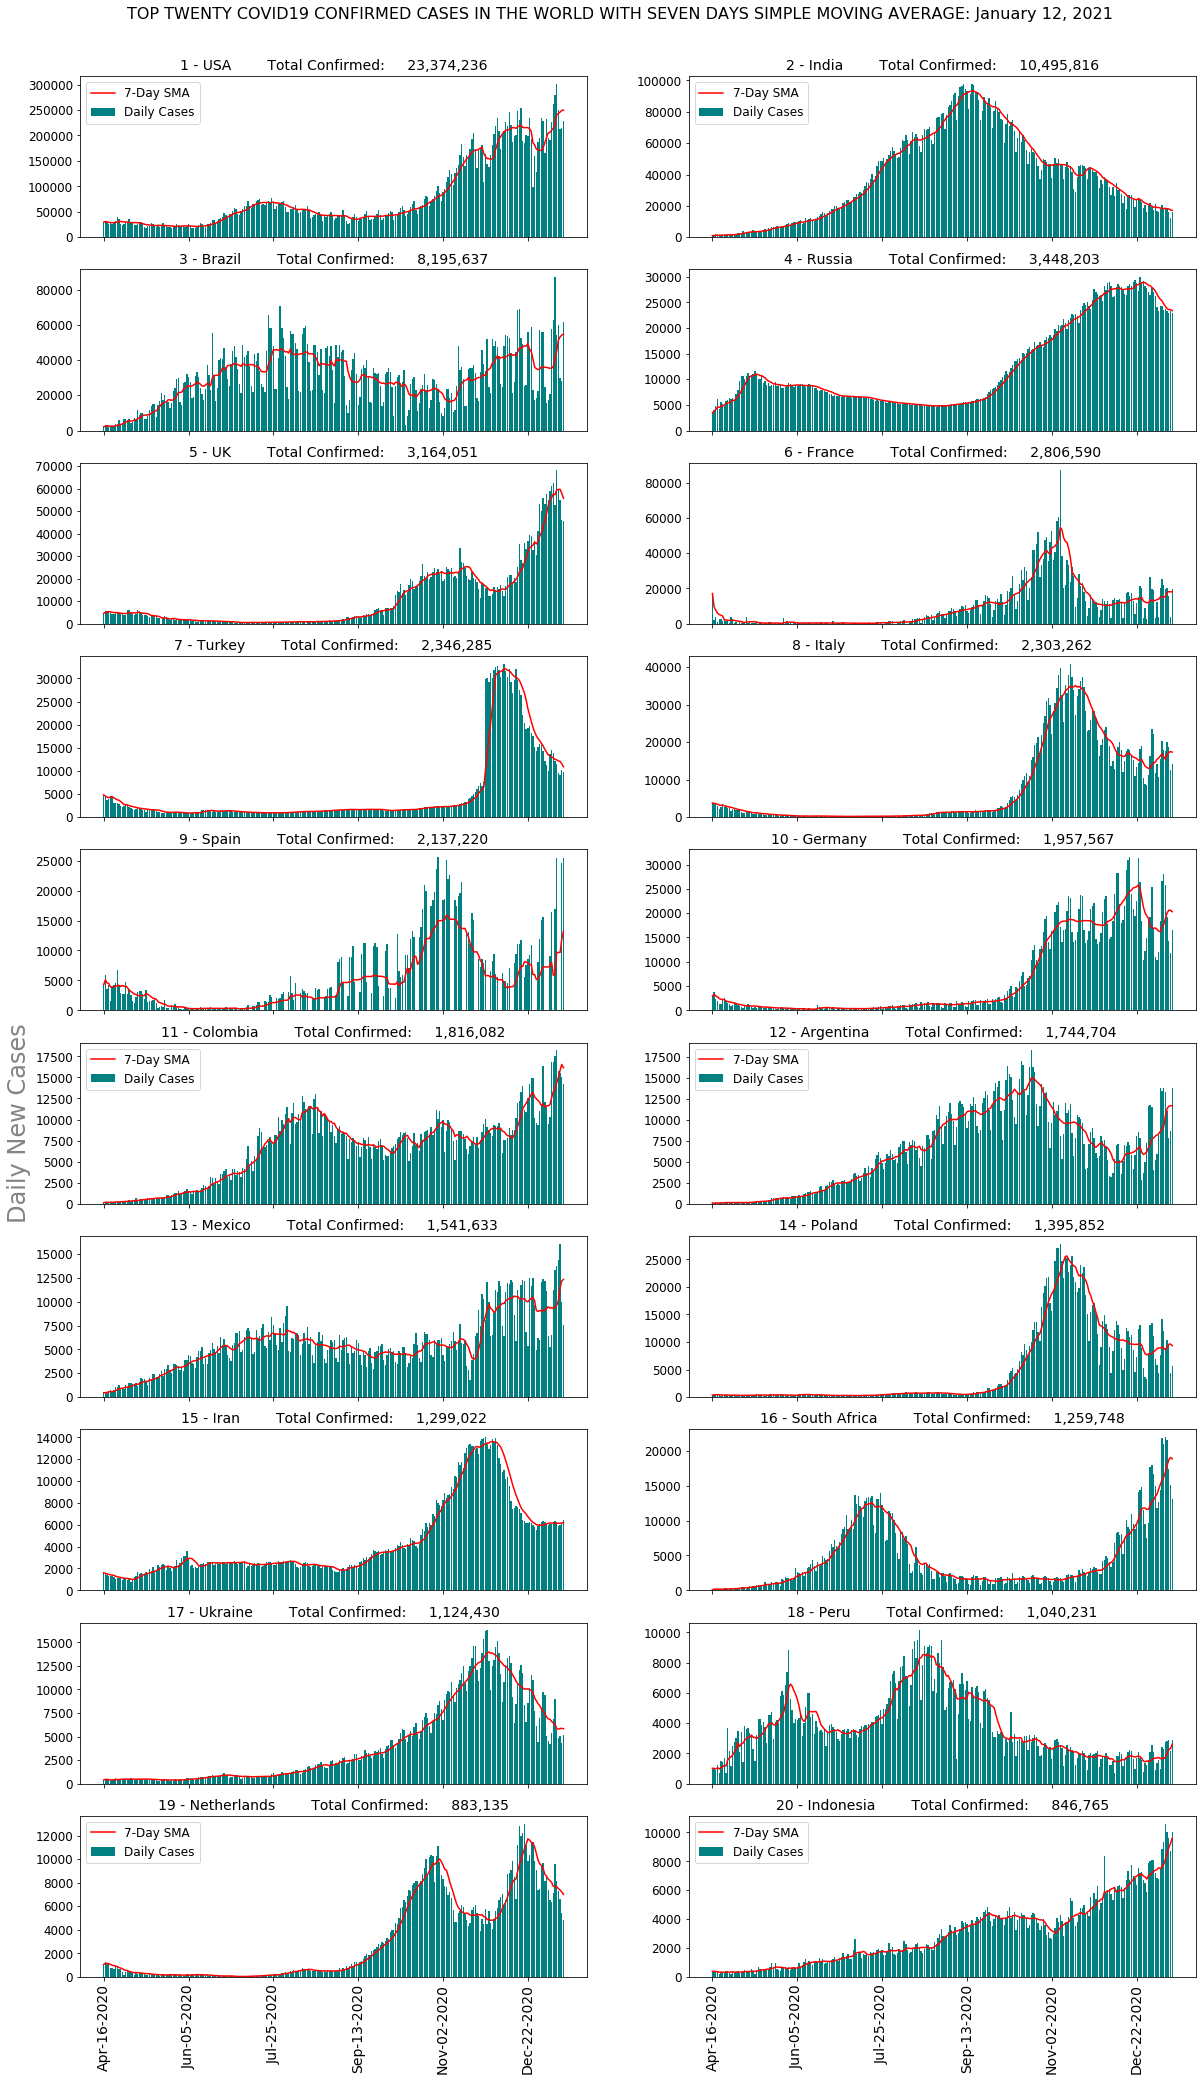

In [17]:
fig = plt.figure(figsize=(20, 32))
plt.suptitle('TOP TWENTY COVID19 CONFIRMED CASES IN THE WORLD WITH SEVEN DAYS SIMPLE MOVING AVERAGE: '+ given_date , fontsize=16)
confirmed_new_cases_per_day=[]
axes_y_position ={'y1':1.0}
axes_pos = [0,1,10,11,18,19]
for country in total_cases_first20:
    country_record = new_cases[new_cases['Country_Other'] == country]
    country_record =  country_record.copy()
    country_record.fillna(0, inplace=True)
    
    ##test
    country_case = new_cases.loc[new_cases['Country_Other'] == country]
    country_case.set_index('Country_Other', inplace=True)
    country_case = country_case.T
    
    country_case[country] = country_case[country].str.replace(',','').fillna(0).str.replace('+','').fillna(0).astype(int)
    
    country_case['SMA_7'] = country_case[country].rolling(7, min_periods=1).mean()
    ##test
    
    
    for date in dates:
        if country_record[date].values[0] == 0:
            total = country_record[date].values[0]
            confirmed_new_cases_per_day.append(int(total))
        else: 
            total = country_record[date].str.replace('+','').fillna(0).str.replace(',','').fillna(0).astype(int)
            confirmed_new_cases_per_day.append(int(total))   
            
                   
    ax = fig.add_subplot(len(total_cases_first20)/2,2,total_cases_first20.index(country) + 1)
    ax.bar(format_date(dates), confirmed_new_cases_per_day, color='teal')
    ax.plot(format_date(dates), country_case['SMA_7'], color='red')
    
    country_position = total_cases_first20.index(country)
    ax.set_title(str(country_position + 1) + ' - ' + country  +'        Total Confirmed:    '+'{: ,}'.format(sorted_new_cases_first20_values[country_position]),fontsize=14)
    
    
    if total_cases_first20.index(country)== 10:
        ax.set_ylabel('Daily New Cases', fontsize=24, color='#848484')
    
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=12)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    
    if total_cases_first20.index(country) in axes_pos:
        plt.legend(labels =['7-Day SMA','Daily Cases'], fontsize=12, loc='upper left')
    
    if ax.get_position().y1 < axes_y_position['y1']:
        axes_y_position['y1'] = ax.get_position().y1
        
    confirmed_new_cases_per_day=[]  
    
for a in fig.get_axes():
    if a.get_position().y1 != axes_y_position['y1']:
        tick_labels = ['']*len(a.get_xticklabels())
        a.set_xticklabels(tick_labels)   
        
fig.subplots_adjust(top=0.95) 


In [22]:
continent_summary = pd.read_csv('../COVID19/World/WorldSummary/SouthAmerica/SouthAmerica_summary.csv')
# continent_summary = pd.read_csv('D:\Python\GitHub2\COVID19\World\WorldSummary\SouthAmerica\SouthAmerica_summary.csv')
continent_summary
all_continents_new_cases = pd.DataFrame()
all_continents_new_cases['Date'] = continent_summary['Date']
for continent in continents:
        continent_mod = continent.replace(" ", "")
        full_path = path + continent_mod + '\\'+ continent_mod +'_summary.csv'
        summary = pd.read_csv(full_path)
        all_continents_new_cases[continent] = summary['Total_Cases']
# all_continents_new_cases['Date'] = all_continents_new_cases['Date'].apply(lambda x : x[:-7] +' ' + x[-7:-6]+', '+x[-4:] if '_'in x  else  x[:-2] +' ' +x[-2:]+', ' +'2020' )
all_continents_new_cases['Date'] = all_continents_new_cases['Date'].apply(lambda x : datetime.datetime.strptime(x[:-7], "%b").strftime('%B') +' ' + x[-7:-5]+', '+x[-4:] if '_'in x  else  x[:-2] +' ' +x[-2:]+', ' +'2020' )
all_continents_new_cases['Date'] = pd.to_datetime(all_continents_new_cases['Date'],format='%B %d, %Y')
all_continents_new_cases = all_continents_new_cases.reset_index(drop=True)
all_continents_new_cases=all_continents_new_cases.set_index('Date')
bcr.bar_chart_race(all_continents_new_cases, period_fmt='%B %d, %Y',period_label={'x': .99, 'y': .1, 'ha': 'right', 'color': 'crimson'},title= 'WORLD COVID-19 CONFIRMED CASES: ' + given_date )
